In [14]:
import math
import numpy as np
import sys
#import cv2
import pickle
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 20.0)

In [15]:
input_filename = "data/LAMP_80s_240mpp_ratio_albed_01.img"
shape = (2501, 2501) # matrix size
dtype = np.float32 # big-endian unsigned integer (16bit)
output_filename = "LAMP_BRITE.PNG"

In [16]:
height = np.reshape(np.fromfile(open("data/LDEM_75S_120M.IMG",
                                     'rb'), np.int16),
                    (7624,7624))
albedo = np.reshape(np.fromfile(open("data/LDAM_50S_1000M_FLOAT.IMG",
                                     'rb'), np.float32),
                    (2532,2532))
LAMP_ratio_albed = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_albed_01.img",
                                     'rb'), np.float32),
                    (2501,2501))
LAMP_ratio_brite = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_brite_01.img",
                                     'rb'), np.float32),
                    (2501,2501))

In [17]:
import cv2

height = height[1311:-1311,1311:-1311]
albedo = albedo[966:-966,966:-966]

#height = cv2.resize(height, dsize=LAMP_ratio_albed.shape)
lamp_brite = cv2.resize(LAMP_ratio_brite, dsize=height.shape)
lamp_albed = cv2.resize(LAMP_ratio_albed, dsize=height.shape)
albedo = cv2.resize(albedo, dsize=height.shape)

In [18]:
threshold_albedo = 0.35
threshold_lamp_ratio = 1.2

In [19]:
image = albedo > threshold_albedo

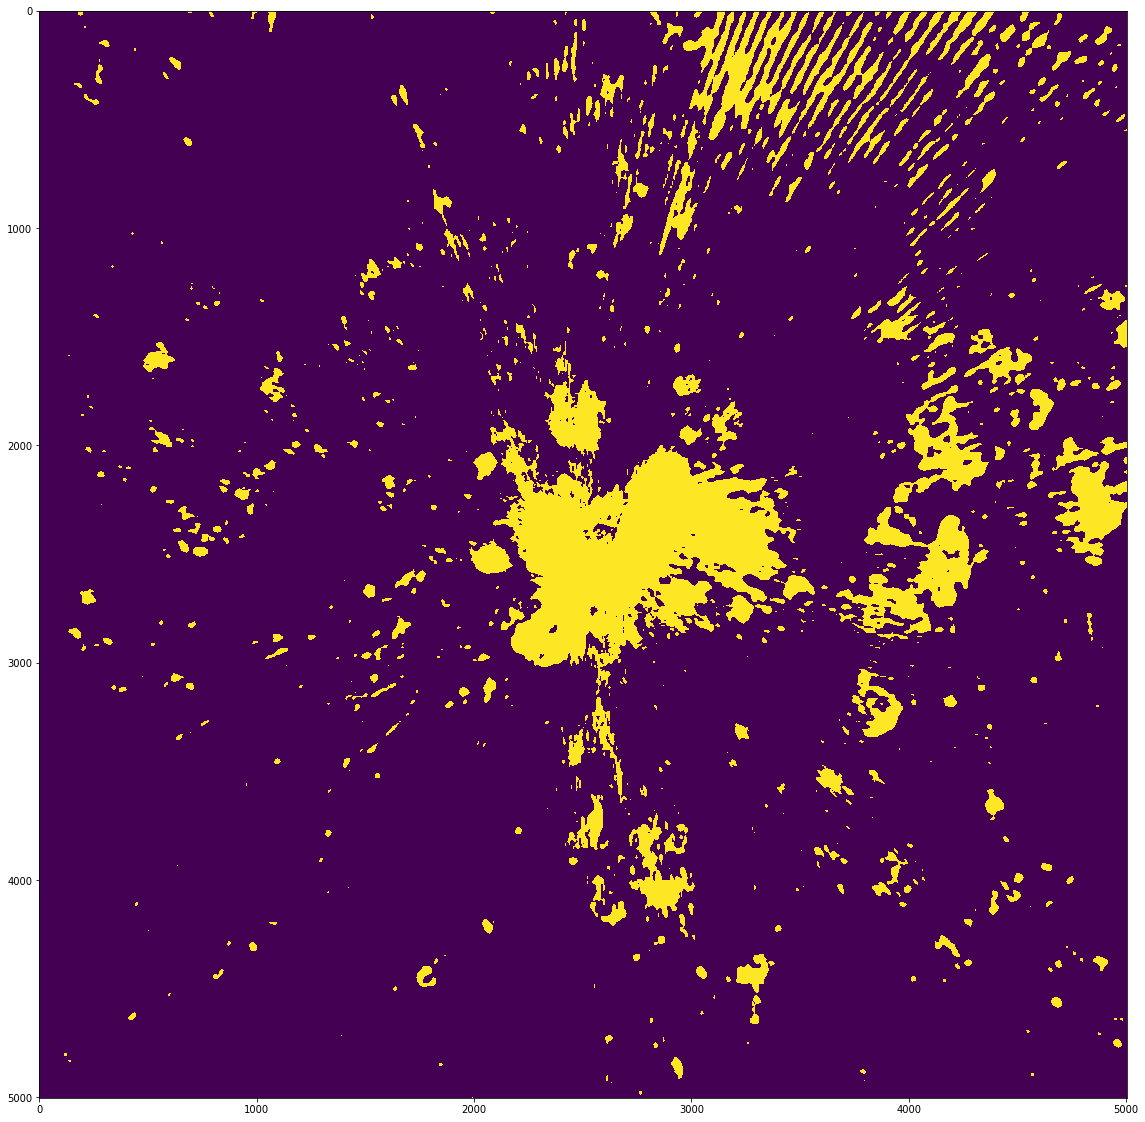

In [20]:
plt.imshow(image)
plt.savefig(output_filename)
plt.show()

In [21]:
np.array([True, True, False, False]) & np.array([True, False, True, False])  

array([ True, False, False, False])

In [22]:
POI = ((lamp_albed > threshold_lamp_ratio) & 
        (lamp_brite > threshold_lamp_ratio) & 
        (albedo > threshold_albedo))

/home/georgesmss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [23]:
top_left = (1500,450)
bottom_right = (top_left[0] + 200, top_left[1] + 200)

In [24]:
POI2 = POI * 200

In [25]:
POI3 = POI2
POI3[top_left[0]:top_left[0]+10,top_left[1]:bottom_right[1]] = 255 #upper bar
POI3[bottom_right[0]:bottom_right[0]+10,top_left[1]:bottom_right[1]] = 255 #lower bar
POI3[top_left[0]:bottom_right[0],top_left[1]:top_left[1]+10] = 255 #to the left
POI3[top_left[0]:bottom_right[0],bottom_right[1]:bottom_right[1]+10] = 255 #to the right

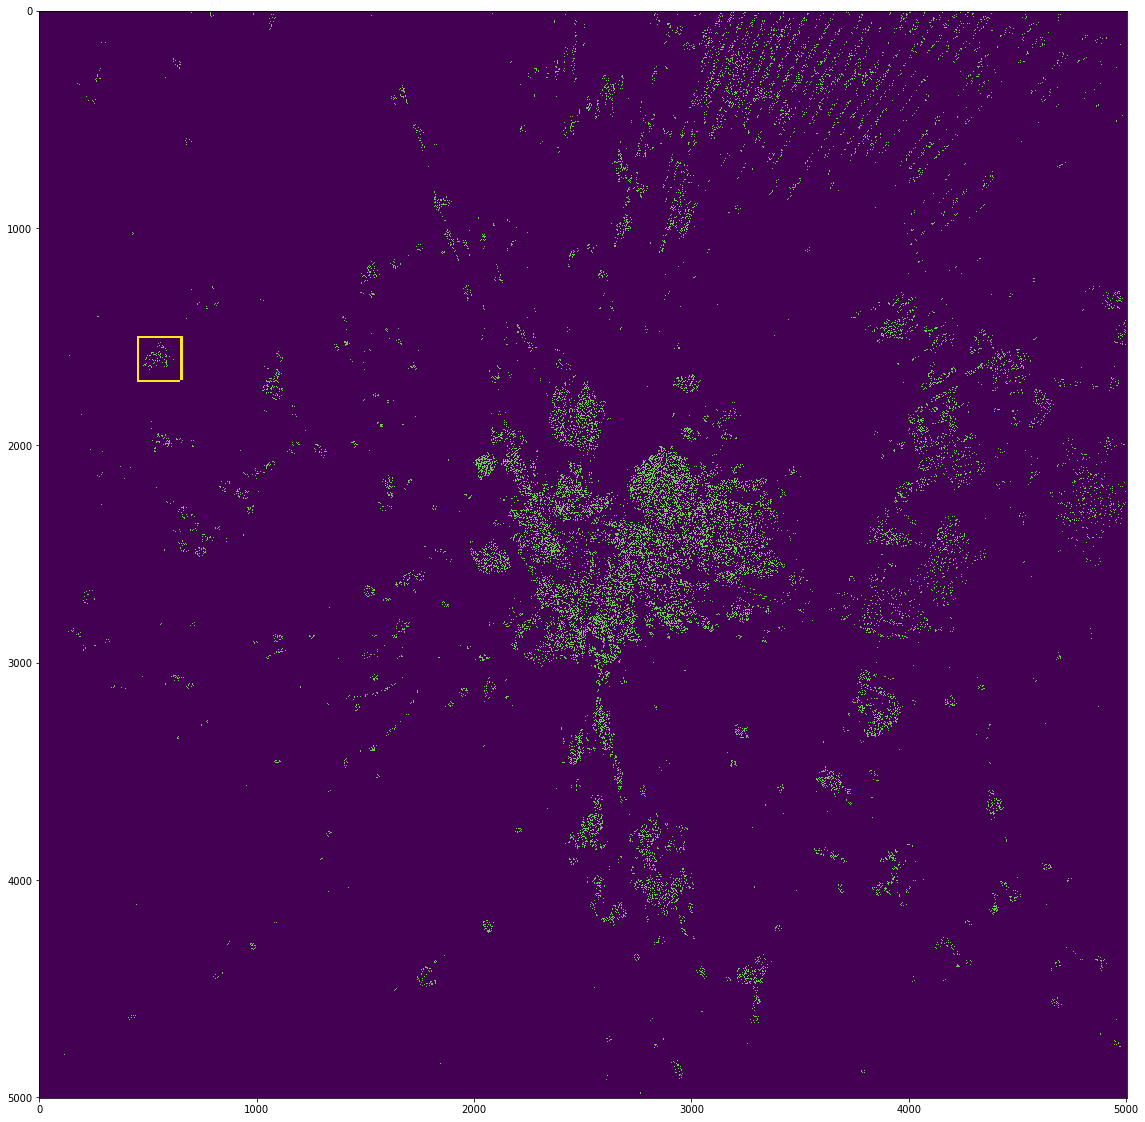

In [26]:
plt.imshow(POI3)
plt.savefig("agua_no_polo_sul_da_lua_uau.png")
plt.show()

# Optimization Step

In [78]:
m_per_px = 120
rover_max_dist_m = 24000
rover_max_dist_px = int(rover_max_dist_km / km_per_px) + 1

In [41]:
POI_little = POI[top_left[0]:top_left[0]+rover_max_dist_px,
                top_left[1]:top_left[1]+rover_max_dist_px]
POI_little.shape

(201, 201)

In [42]:
height_little = height[top_left[0]:top_left[0]+rover_max_dist_px,
                        top_left[1]:top_left[1]+rover_max_dist_px]
height_little.shape

(201, 201)

In [62]:
import copy

In [68]:
POI_little_filter = copy.deepcopy(POI_little)

In [69]:
for i in range(1,rover_max_dist_px-1):
    for j in range(1,rover_max_dist_px-1):
        POI_little_filter[i,j] =(POI_little[i-1,j-1] & POI_little[i-1,j] & POI_little[i-1,j+1] & 
                                POI_little[i,j-1] & POI_little[i,j] & POI_little[i,j+1] & 
                                POI_little[i+1,j-1] & POI_little[i+1,j] & POI_little[i+1,j+1])
        
                            

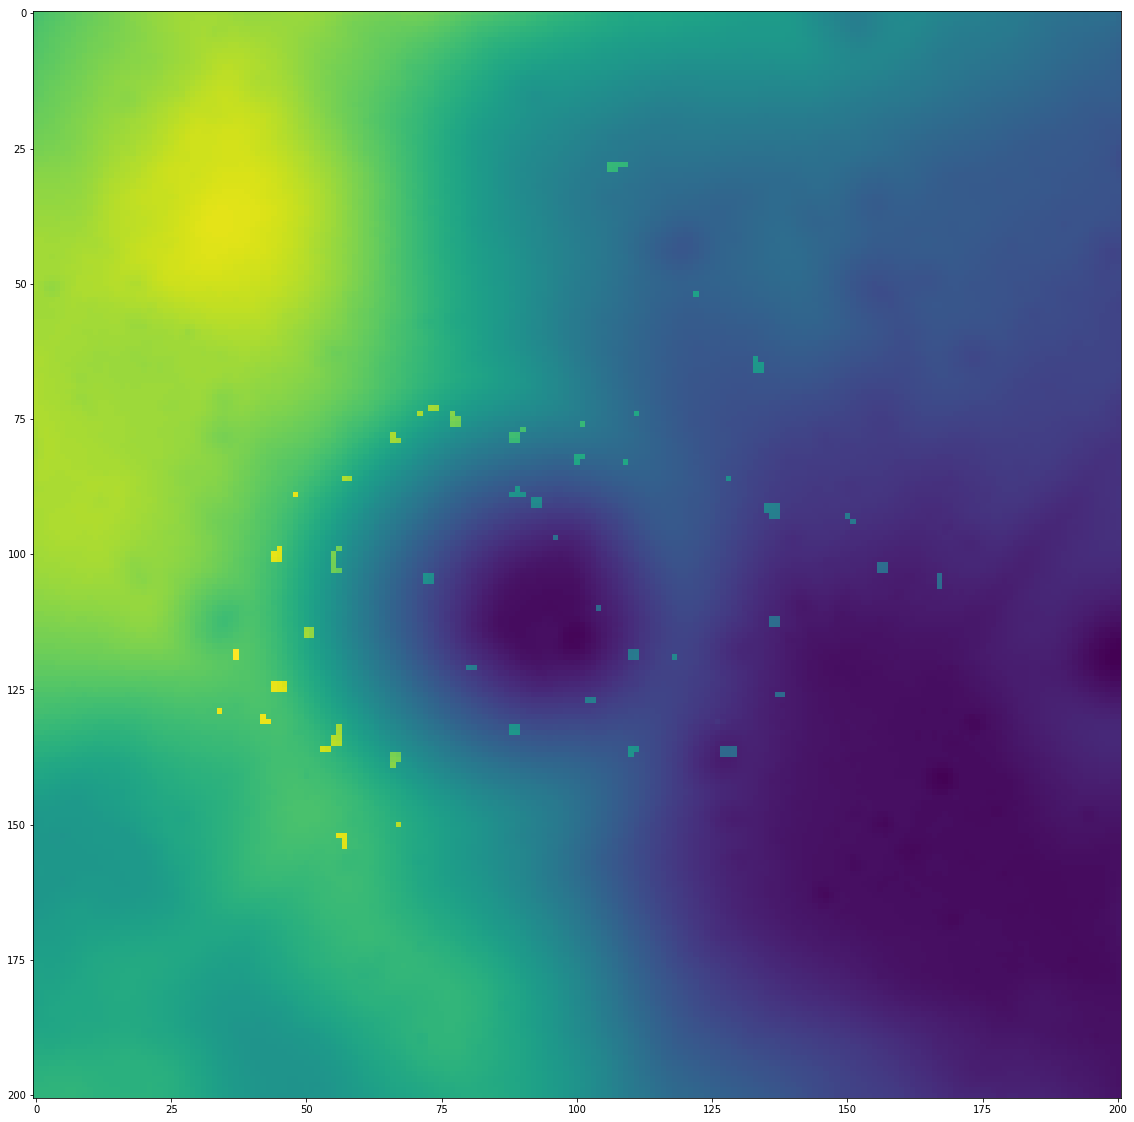

In [90]:
plt.imshow(height_little+2000*POI_little_filter)

In [44]:
rover_max_dist_px

201

In [73]:
import networkx as nx

In [74]:
G=nx.DiGraph()

In [76]:
for i in np.arange(rover_max_dist_px):
    for j in np.arange(rover_max_dist_px):
        G.add_node((i,j))

In [ ]:
for i in np.arange(rover_max_dist_px-1):
    for j in np.arange(rover_max_dist_px-1):
        G.add_edges((i,j))

In [83]:
height_little

array([[ -703,  -653,  -606, ..., -3322, -3368, -3412],
       [ -686,  -636,  -591, ..., -3368, -3400, -3464],
       [ -661,  -605,  -561, ..., -3415, -3445, -3502],
       ...,
       [-1193, -1196, -1188, ..., -5661, -5689, -5713],
       [-1178, -1181, -1172, ..., -5642, -5671, -5701],
       [-1175, -1175, -1167, ..., -5630, -5658, -5684]], dtype=int16)

In [ ]:
def weight_linear(i1, j1, i2, j2):
    height1 = height_little[i1,j1]
    height2 = height_little[i2,j2]
    delta = abs


def weight_diagonal(i1, j1, i2, j2):

In [ ]:
for i in np.arange(rover_max_dist_px) - math.floor(rover_max_dist_px/2):
    for j in np.arange(rover_max_dist_px) - math.floor(rover_max_dist_px/2):
        G.add_edge((i,j),(i,j+1), weight=  )
        G.add_edge((i,j+1),(i,j), "distance" = )
        G.add_edge((i,j),(i+1,j+1), "distance" = )
        G.add_edge((i+1,j+1),(i,j), "distance" = )
        G.add_edge((i,j),(i+1,j), "distance" = )
        G.add_edge((i+1,j),(i,j), "distance" = )

In [35]:
G.add_nodes_from([(1,1), (1,2), (2,1), (2,2)])

In [37]:
G.node[(1,1)].

{}

In [ ]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [ ]:
G = nx.path_graph(5)
path = nx.single_source_shortest_path(G, 0)
path[4]